In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns


In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Set the path to the desired directory
path = "/Users/tirdodbehbehani/Desktop/BSE/Term 1/Statistical Modeling and Inference/Project/Data/kagg"

# Change the working directory
os.chdir(path)

# Verify the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/tirdodbehbehani/Desktop/BSE/Term 1/Statistical Modeling and Inference/Project/Data/kagg


In [4]:
os.listdir()

['standard_stats.csv',
 'combined_totals.csv',
 'goal_and_shot_creation.csv',
 'defensive_actions.csv',
 '.DS_Store',
 'combined_per_90.csv',
 'passing.csv',
 'miscellaneous_stats.csv',
 'shooting.csv',
 'possession.csv',
 'playing_time.csv']

In [5]:
import os
import pandas as pd

# Directory containing the CSV files
directory = os.getcwd()  # Or specify your directory

# List of seasons and leagues to keep
seasons_to_keep = ['2019-2020', '2020-2021', '2021-2022', '2022-2023']
leagues_to_keep = ['EPL', 'Bundesliga', 'LaLiga', 'Ligue1', 'SeriaA']

# Get all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Dynamically load, clean, filter, and drop null-heavy columns for each CSV
for csv_file in csv_files:
    # Load the CSV file
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)
    
    # Clean column names: replace spaces with underscores, lowercase, and replace % with _perc
    df.columns = (df.columns.str.strip()
                           .str.lower()
                           .str.replace(' ', '_')
                           .str.replace(r'[^\w%]', '', regex=True)  # Keep percentage sign (%)
                           .str.replace('%', '_perc')  # Replace percentage sign with _perc
                           .map(lambda x: x.split('_')[-1] if x.lower().startswith('unnamed') else x))
    
    # Drop columns with more than 75% null values
    null_threshold = 0.75 * len(df)
    df = df.loc[:, df.isnull().mean() <= 0.75]

    # Check for 'season' column and filter rows
    if 'season' in df.columns:
        df = df[df['season'].isin(seasons_to_keep)]
        print(f"{csv_file}: Filtered rows for specified seasons. Remaining rows: {len(df)}")
    else:
        print(f"'season' column not found in {csv_file}. Skipping file.")
        continue

    # Check for 'league' column and filter rows
    if 'league' in df.columns:
        df = df[df['league'].isin(leagues_to_keep)]
        print(f"{csv_file}: Filtered rows for specified leagues. Remaining rows: {len(df)}")
    else:
        print(f"'league' column not found in {csv_file}. Skipping league filtering.")

    # Drop rows where 'player' is in ['Squad Total', 'Opponent Total']
    if 'player' in df.columns:
        df = df[~df['player'].isin(['Squad Total', 'Opponent Total'])]
        print(f"{csv_file}: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: {len(df)}")
    else:
        print(f"'player' column not found in {csv_file}. Skipping 'player' filtering.")
    
    # Dynamically assign the cleaned, filtered DataFrame
    df_name = os.path.splitext(csv_file)[0]  # Get the base file name (e.g., "shooting")
    globals()[df_name] = df  # Assign to a variable in the global scope
    print(f"Loaded and cleaned DataFrame: {df_name} with shape {df.shape}")

/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (27,38,39,40,41,42,43,44,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


standard_stats.csv: Filtered rows for specified seasons. Remaining rows: 19895
standard_stats.csv: Filtered rows for specified leagues. Remaining rows: 14592
standard_stats.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 13808
Loaded and cleaned DataFrame: standard_stats with shape (13808, 27)
combined_totals.csv: Filtered rows for specified seasons. Remaining rows: 11364
combined_totals.csv: Filtered rows for specified leagues. Remaining rows: 11364
combined_totals.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: combined_totals with shape (11364, 41)
goal_and_shot_creation.csv: Filtered rows for specified seasons. Remaining rows: 16768
goal_and_shot_creation.csv: Filtered rows for specified leagues. Remaining rows: 12148
goal_and_shot_creation.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame:

/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (25,26,27,28,29,30,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (25,26,27,28,29,30,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


defensive_actions.csv: Filtered rows for specified seasons. Remaining rows: 16768
defensive_actions.csv: Filtered rows for specified leagues. Remaining rows: 12148
defensive_actions.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: defensive_actions with shape (11364, 25)
combined_per_90.csv: Filtered rows for specified seasons. Remaining rows: 11364
combined_per_90.csv: Filtered rows for specified leagues. Remaining rows: 11364
combined_per_90.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: combined_per_90 with shape (11364, 45)
passing.csv: Filtered rows for specified seasons. Remaining rows: 16768
passing.csv: Filtered rows for specified leagues. Remaining rows: 12148
passing.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: passing with shape (11364, 32)


/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (32,33,34,35,36,37,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (20,25,26,27,28,29,30,31,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


miscellaneous_stats.csv: Filtered rows for specified seasons. Remaining rows: 16768
miscellaneous_stats.csv: Filtered rows for specified leagues. Remaining rows: 12148
miscellaneous_stats.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: miscellaneous_stats with shape (11364, 21)


/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (19,26,27,28,29,30,31,32,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


shooting.csv: Filtered rows for specified seasons. Remaining rows: 16768
shooting.csv: Filtered rows for specified leagues. Remaining rows: 12148
shooting.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: shooting with shape (11364, 17)
possession.csv: Filtered rows for specified seasons. Remaining rows: 16768
possession.csv: Filtered rows for specified leagues. Remaining rows: 12148
possession.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 11364
Loaded and cleaned DataFrame: possession with shape (11364, 31)
playing_time.csv: Filtered rows for specified seasons. Remaining rows: 19895
playing_time.csv: Filtered rows for specified leagues. Remaining rows: 14592
playing_time.csv: Dropped rows where 'player' is in ['Squad Total', 'Opponent Total']. Remaining rows: 13808
Loaded and cleaned DataFrame: playing_time with shape (13808, 31)


/var/folders/yc/3pyxzslx2r38qfymk39c_bpw0000gn/T/ipykernel_48876/2293267215.py:18: DtypeWarning: Columns (31,32,33,34,35,36,37,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
# List of DataFrames to clean
dataframes = [
    standard_stats, 
    goal_and_shot_creation, 
    defensive_actions, 
    passing, 
    miscellaneous_stats, 
    shooting, 
    possession, 
    playing_time
]

# Drop the 'matches' column if it exists in any DataFrame
for i, df in enumerate(dataframes):
    if 'matches' in df.columns:
        dataframes[i] = df.drop(columns=['matches'])
        print(f"'matches' column dropped from DataFrame {i+1}. Remaining columns: {dataframes[i].shape[1]}")
    else:
        print(f"'matches' column not found in DataFrame {i+1}.")

# Reassign cleaned DataFrames back to their variables
(standard_stats, goal_and_shot_creation, defensive_actions, 
 passing, miscellaneous_stats, shooting, 
 possession, playing_time) = dataframes

'matches' column dropped from DataFrame 1. Remaining columns: 25
'matches' column dropped from DataFrame 2. Remaining columns: 24
'matches' column dropped from DataFrame 3. Remaining columns: 24
'matches' column dropped from DataFrame 4. Remaining columns: 31
'matches' column dropped from DataFrame 5. Remaining columns: 20
'matches' column dropped from DataFrame 6. Remaining columns: 16
'matches' column dropped from DataFrame 7. Remaining columns: 30
'matches' column dropped from DataFrame 8. Remaining columns: 30


In [7]:
possession.head()

,season,league,team,player,nation,pos,age,90s,touches_touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,touches_live,takeons_att,takeons_succ,takeons_succ_perc,takeons_tkld,takeons_tkld_perc,carries_carries,carries_totdist,carries_prgdist,carries_prgc,carries_13,carries_cpa,carries_mis,carries_dis,receiving_rec,receiving_prgr
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,3588.0,315.0,1365.0,2126.0,102.0,49.0,3588.0,4.0,3.0,75.0,1.0,25.0,2484.0,9365.0,4594.0,21.0,19.0,3.0,2.0,2.0,2580.0,14.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,3582.0,99.0,825.0,1590.0,1193.0,54.0,3582.0,51.0,21.0,41.2,30.0,58.8,2136.0,9096.0,5332.0,98.0,113.0,16.0,47.0,12.0,2281.0,226.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,1947.0,41.0,267.0,1168.0,530.0,74.0,1947.0,74.0,41.0,55.4,33.0,44.6,1410.0,6609.0,3045.0,74.0,67.0,5.0,43.0,30.0,1439.0,99.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,3296.0,89.0,622.0,1575.0,1129.0,83.0,3296.0,44.0,22.0,50.0,22.0,50.0,2152.0,10659.0,6603.0,149.0,115.0,20.0,50.0,9.0,2317.0,277.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,1558.0,16.0,103.0,697.0,775.0,211.0,1558.0,90.0,52.0,57.8,38.0,42.2,1082.0,5483.0,2646.0,90.0,62.0,35.0,92.0,39.0,1203.0,218.0


In [8]:
#standard_stats['test'] = standard_stats['playing_time_min']/90
standard_stats.head(10)

,season,league,team,player,nation,pos,age,mp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_ga,performance_gpk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_ga,per_90_minutes_gpk,per_90_minutes_gapk,playing_time_mp
76825,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,NaN,38.0,3420.0,38.0,5.0,1.0,6.0,5.0,0.0,0.0,1.0,0.0,0.13,0.03,0.16,0.13,0.16,38.0
76826,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,NaN,35.0,3175.0,35.3,4.0,13.0,17.0,4.0,0.0,0.0,5.0,0.0,0.11,0.37,0.48,0.11,0.48,38.0
76827,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,NaN,35.0,2935.0,32.6,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.12,0.00,0.12,0.12,0.12,37.0
76828,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,NaN,34.0,3111.0,34.6,2.0,12.0,14.0,2.0,0.0,0.0,2.0,0.0,0.06,0.35,0.41,0.06,0.41,36.0
76829,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,NaN,34.0,2988.0,33.2,9.0,8.0,17.0,9.0,0.0,0.0,0.0,0.0,0.27,0.24,0.51,0.27,0.51,38.0
76830,2019-2020,EPL,Liverpool,Mohamed Salah,eg EGY,FW,27.0,NaN,33.0,2876.0,32.0,19.0,10.0,29.0,16.0,3.0,3.0,1.0,0.0,0.59,0.31,0.91,0.50,0.81,34.0
76831,2019-2020,EPL,Liverpool,Sadio Mané,sn SEN,FW,27.0,NaN,31.0,2747.0,30.5,18.0,7.0,25.0,18.0,0.0,0.0,3.0,0.0,0.59,0.23,0.82,0.59,0.82,35.0
76832,2019-2020,EPL,Liverpool,Alisson,br BRA,GK,26.0,NaN,29.0,2543.0,28.3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.04,0.04,0.00,0.04,29.0
76833,2019-2020,EPL,Liverpool,Jordan Henderson,eng ENG,MF,29.0,NaN,26.0,2238.0,24.9,4.0,5.0,9.0,4.0,0.0,0.0,2.0,0.0,0.16,0.20,0.36,0.16,0.36,30.0
76834,2019-2020,EPL,Liverpool,Fabinho,br BRA,MF,25.0,NaN,22.0,2079.0,23.1,2.0,3.0,5.0,2.0,0.0,0.0,6.0,0.0,0.09,0.13,0.22,0.09,0.22,28.0


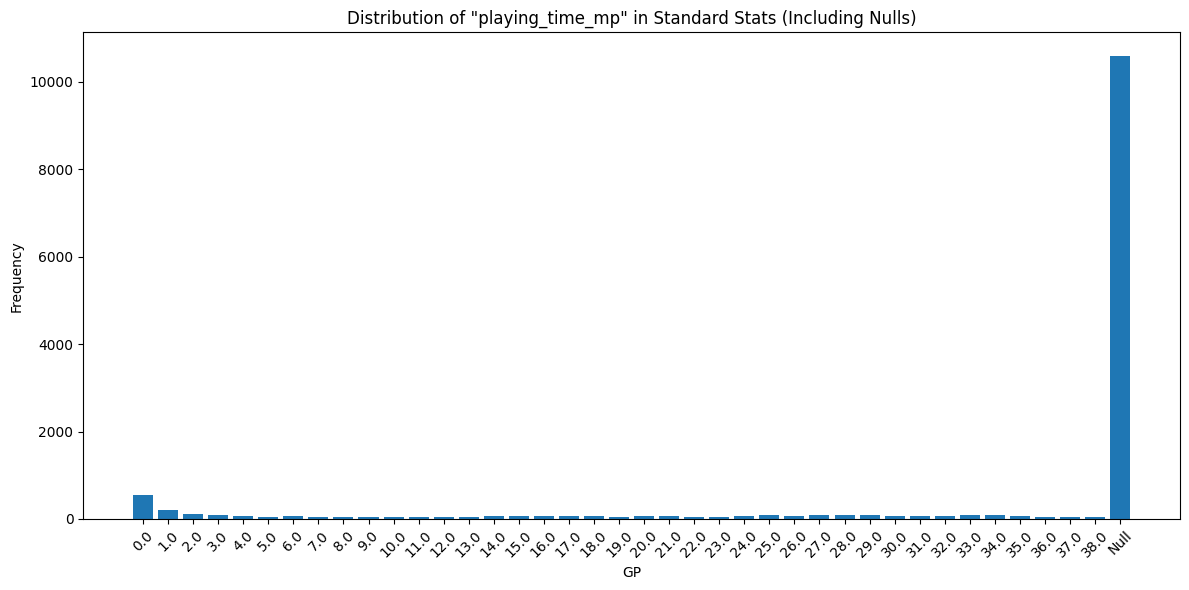

In [9]:
import matplotlib.pyplot as plt

# Count value frequencies including nulls
mp_counts = standard_stats['playing_time_mp'].value_counts(dropna=False).sort_index()

# Replace NaN with a label for visualization
mp_counts.index = mp_counts.index.astype(str).str.replace('nan', 'Null')

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mp_counts.index, mp_counts.values, width=0.8)
plt.title('Distribution of "playing_time_mp" in Standard Stats (Including Nulls)')
plt.xlabel('GP')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [42]:
# # Identify columns for totals and per 90 stats
# non_stat_columns = ['season', 'league', 'team', 'player', 'nation', 'pos', 'age', 'gp']
# totals_columns = [
#     'playing_time_starts', 'playing_time_min', 'playing_time_90s', 
#     'performance_gls', 'performance_ast', 'performance_ga', 
#     'performance_gpk', 'performance_pk', 'performance_pkatt', 
#     'performance_crdy', 'performance_crdr'
# ]
# per_90_columns = [
#     'per_90_minutes_gls', 'per_90_minutes_ast', 'per_90_minutes_ga', 
#     'per_90_minutes_gpk', 'per_90_minutes_gapk'
# ]

# # Create totals DataFrame
# standard_stats_totals = standard_stats[non_stat_columns + totals_columns]

# # Create per 90 DataFrame
# standard_stats_per_90 = standard_stats[non_stat_columns + per_90_columns]


In [43]:
goal_and_shot_creation.head()

,season,league,team,player,nation,pos,age,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,35.0,0.92,28.0,0.0,0.0,5.0,1.0,1.0,7.0,0.18,5.0,0.0,0.0,1.0,1.0,0.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,155.0,4.39,93.0,51.0,3.0,6.0,1.0,1.0,24.0,0.68,15.0,7.0,0.0,2.0,0.0,0.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,55.0,1.69,49.0,0.0,2.0,2.0,2.0,0.0,4.0,0.12,4.0,0.0,0.0,0.0,0.0,0.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,130.0,3.76,106.0,15.0,4.0,3.0,0.0,2.0,22.0,0.64,18.0,2.0,2.0,0.0,0.0,0.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,114.0,3.43,90.0,0.0,12.0,7.0,2.0,3.0,20.0,0.60,16.0,0.0,2.0,1.0,0.0,1.0


In [44]:
defensive_actions.head()

,season,league,team,player,nation,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl_perc,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tklint,clr,err
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,23.0,12.0,18.0,5.0,0.0,6.0,13.0,46.2,7.0,20.0,15.0,5.0,40.0,63.0,166.0,2.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,55.0,34.0,35.0,17.0,3.0,36.0,78.0,46.2,42.0,27.0,9.0,18.0,45.0,100.0,84.0,3.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,38.0,20.0,12.0,21.0,5.0,10.0,40.0,25.0,30.0,18.0,4.0,14.0,17.0,55.0,34.0,3.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,54.0,31.0,17.0,25.0,12.0,27.0,61.0,44.3,34.0,29.0,7.0,22.0,38.0,92.0,72.0,1.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,37.0,19.0,8.0,14.0,15.0,10.0,43.0,23.3,33.0,34.0,3.0,31.0,7.0,44.0,11.0,1.0


In [45]:
shooting.head()

,season,league,team,player,nation,pos,age,90s,standard_gls,standard_sh,standard_sot,standard_sh90,standard_sot90,standard_gsot,standard_pk,standard_pkatt
73654,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,5.0,31.0,14.0,0.82,0.37,0.36,0.0,0.0
73655,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,4.0,44.0,13.0,1.25,0.37,0.31,0.0,0.0
73656,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,4.0,36.0,15.0,1.10,0.46,0.27,0.0,0.0
73657,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,2.0,22.0,6.0,0.64,0.17,0.33,0.0,0.0
73658,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,9.0,99.0,38.0,2.98,1.14,0.24,0.0,0.0


In [46]:
# Get the index of the 'mp' column
mp_index = standard_stats.columns.get_loc('mp')
    
# Drop the 'mp' column
standard_stats = standard_stats.drop(columns=['mp'])
    
# Rename 'playing_time_mp' to 'gp'
standard_stats = standard_stats.rename(columns={'playing_time_mp': 'gp'})
    
# Move the 'gp' column to where 'mp' was located
cols = standard_stats.columns.tolist()  # Convert columns to a list
cols.insert(mp_index, cols.pop(cols.index('gp')))  # Move 'gp' to the correct location
standard_stats = standard_stats[cols]  # Reorder columns
    
print("Updated DataFrame:")
standard_stats.head()

Updated DataFrame:


,season,league,team,player,nation,pos,age,gp,playing_time_starts,playing_time_min,playing_time_90s,performance_gls,performance_ast,performance_ga,performance_gpk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per_90_minutes_gls,per_90_minutes_ast,per_90_minutes_ga,per_90_minutes_gpk,per_90_minutes_gapk
76825,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,38.0,3420.0,38.0,5.0,1.0,6.0,5.0,0.0,0.0,1.0,0.0,0.13,0.03,0.16,0.13,0.16
76826,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,38.0,35.0,3175.0,35.3,4.0,13.0,17.0,4.0,0.0,0.0,5.0,0.0,0.11,0.37,0.48,0.11,0.48
76827,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,37.0,35.0,2935.0,32.6,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.12,0.00,0.12,0.12,0.12
76828,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,36.0,34.0,3111.0,34.6,2.0,12.0,14.0,2.0,0.0,0.0,2.0,0.0,0.06,0.35,0.41,0.06,0.41
76829,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,38.0,34.0,2988.0,33.2,9.0,8.0,17.0,9.0,0.0,0.0,0.0,0.0,0.27,0.24,0.51,0.27,0.51


In [47]:
# # List of columns to keep
# columns_to_keep = ['season', 'league', 'player', 'gp', 'pos']  # Add other column names as needed

# # Check if all specified columns exist in the DataFrame
# missing_columns = [col for col in columns_to_keep if col not in standard_stats.columns]
# if missing_columns:
#     print(f"The following columns are missing in standard_stats: {missing_columns}")
# else:
#     # Subset the DataFrame
#     subset_standard_stats = standard_stats[columns_to_keep]
#     print("Subset DataFrame:")
#     print(subset_standard_stats.head())

In [48]:
goal_and_shot_creation.head()

,season,league,team,player,nation,pos,age,90s,sca_sca,sca_sca90,sca_types_passlive,sca_types_passdead,sca_types_to,sca_types_sh,sca_types_fld,sca_types_def,gca_gca,gca_gca90,gca_types_passlive,gca_types_passdead,gca_types_to,gca_types_sh,gca_types_fld,gca_types_def
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,35.0,0.92,28.0,0.0,0.0,5.0,1.0,1.0,7.0,0.18,5.0,0.0,0.0,1.0,1.0,0.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,155.0,4.39,93.0,51.0,3.0,6.0,1.0,1.0,24.0,0.68,15.0,7.0,0.0,2.0,0.0,0.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,55.0,1.69,49.0,0.0,2.0,2.0,2.0,0.0,4.0,0.12,4.0,0.0,0.0,0.0,0.0,0.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,130.0,3.76,106.0,15.0,4.0,3.0,0.0,2.0,22.0,0.64,18.0,2.0,2.0,0.0,0.0,0.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,114.0,3.43,90.0,0.0,12.0,7.0,2.0,3.0,20.0,0.60,16.0,0.0,2.0,1.0,0.0,1.0


In [49]:
# List of columns to keep
columns_to_keep = [
    'season', 'league', 'team', 'player',
    'sca_sca', 'sca_sca90', 
    'gca_gca', 'gca_gca90'
]

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_keep if col not in goal_and_shot_creation.columns]
if missing_columns:
    print(f"The following columns are missing in goal_and_shot_creation: {missing_columns}")
else:
    # Create a new subset DataFrame
    goal_and_shot_creation_clean = goal_and_shot_creation[columns_to_keep]
    print("New Subset DataFrame (goal_and_shot_creation_clean):")

New Subset DataFrame (goal_and_shot_creation_clean):


In [50]:
# Create the goal_and_shot_creation_total DataFrame by copying the original DataFrame
goal_and_shot_creation_totals = goal_and_shot_creation_clean[['season', 'league', 'team', 'player', 'sca_sca', 'gca_gca']].copy()

# Create the goal_and_shot_creation_per_90 DataFrame by selecting only the per 90 columns
goal_and_shot_creation_per_90 = goal_and_shot_creation_clean[['season', 'league', 'team', 'player', 'sca_sca90', 'gca_gca90']].copy()

In [51]:
# Display both DataFrames for verification
print("Total Stats (goal_and_shot_creation_total):")
goal_and_shot_creation_totals.head()

Total Stats (goal_and_shot_creation_total):


,season,league,team,player,sca_sca,gca_gca
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,35.0,7.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,155.0,24.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,55.0,4.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,130.0,22.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,114.0,20.0


In [52]:
print("\nPer 90 Stats (goal_and_shot_creation_per_90):")
goal_and_shot_creation_per_90.head()


Per 90 Stats (goal_and_shot_creation_per_90):


,season,league,team,player,sca_sca90,gca_gca90
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,0.92,0.18
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,4.39,0.68
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,1.69,0.12
6832,2019-2020,EPL,Liverpool,Andrew Robertson,3.76,0.64
6833,2019-2020,EPL,Liverpool,Roberto Firmino,3.43,0.60


In [53]:
defensive_actions.head()

,season,league,team,player,nation,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl_perc,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tklint,clr,err
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,23.0,12.0,18.0,5.0,0.0,6.0,13.0,46.2,7.0,20.0,15.0,5.0,40.0,63.0,166.0,2.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,55.0,34.0,35.0,17.0,3.0,36.0,78.0,46.2,42.0,27.0,9.0,18.0,45.0,100.0,84.0,3.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,38.0,20.0,12.0,21.0,5.0,10.0,40.0,25.0,30.0,18.0,4.0,14.0,17.0,55.0,34.0,3.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,54.0,31.0,17.0,25.0,12.0,27.0,61.0,44.3,34.0,29.0,7.0,22.0,38.0,92.0,72.0,1.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,37.0,19.0,8.0,14.0,15.0,10.0,43.0,23.3,33.0,34.0,3.0,31.0,7.0,44.0,11.0,1.0


In [54]:
# Step 1: Create a copy of the original DataFrame for totals
defensive_actions_totals = defensive_actions.copy()

# Step 2: Create a copy of the original DataFrame for per 90 stats
defensive_actions_per_90 = defensive_actions.copy()

# Step 3: List of columns to calculate per 90 stats (excluding 'challenges_tkl_perc')
columns_to_adjust = [
    'tackles_tkl', 'tackles_tklw', 'tackles_def_3rd', 'tackles_mid_3rd', 
    'tackles_att_3rd', 'challenges_tkl','challenges_att', 'challenges_lost', 
    'blocks_blocks', 'blocks_sh', 'blocks_pass', 'int', 'tklint', 'clr', 'err'
]

# Step 4: Calculate per 90 stats in 'defensive_actions_per_90' (excluding 'challenges_tkl_perc')
if '90s' in defensive_actions_per_90.columns:
    for col in columns_to_adjust:
        if col in defensive_actions_per_90.columns:
            defensive_actions_per_90[f'{col}90'] = defensive_actions_per_90[col] / defensive_actions_per_90['90s']
else:
    print("'90s' column not found in the DataFrame.")

# Step 5: Remove the original columns (totals) from 'defensive_actions_per_90'
columns_to_drop = ['tackles_tkl', 'tackles_tklw', 'tackles_def_3rd', 'tackles_mid_3rd', 
                   'tackles_att_3rd', 'challenges_tkl','challenges_att', 'challenges_lost', 
                   'blocks_blocks', 'blocks_sh', 'blocks_pass', 'int', 'tklint', 'clr', 'err']

defensive_actions_per_90.drop(columns=columns_to_drop, inplace=True)


# Find the current column order
cols_order = defensive_actions_per_90.columns.tolist()

# Find the indices of 'challenges_att90' and 'challenges_tkl_percentage'
challenges_att90_index = cols_order.index('challenges_att90')
challenges_tkl_percentage_index = cols_order.index('challenges_tkl_perc')

# Remove 'challenges_tkl_percentage' from its current position
cols_order.remove('challenges_tkl_perc')

# Insert 'challenges_tkl_percentage' after 'challenges_att90'
cols_order.insert(challenges_att90_index, 'challenges_tkl_perc')

# Reorder the DataFrame columns
defensive_actions_per_90 = defensive_actions_per_90[cols_order]

# Display the updated DataFrame to verify
print(defensive_actions_per_90.head())

# # Step 6: Ensure 'challenges_tkl_percentage' is included in both DataFrames at the same index
# # Add 'challenges_tkl_percentage' to 'defensive_actions_per_90' if it's not already present
# if 'challenges_tkl_perc' not in defensive_actions_per_90.columns:
#     defensive_actions_per_90['challenges_tkl_perc'] = defensive_actions['challenges_tkl_perc']

# # Step 7: Reorder the columns to make sure 'challenges_tkl_percentage' stays in the same index position
# cols_order_total = defensive_actions_totals.columns.tolist()
# cols_order_per_90 = [col for col in defensive_actions_per_90.columns if col != 'challenges_tkl_perc']
# cols_order_per_90.insert(cols_order_total.index('challenges_tkl_perc'), 'challenges_tkl_perc')

# # Apply the new column order to the per 90 DataFrame
# defensive_actions_per_90 = defensive_actions_per_90[cols_order_per_90]

# Step 1: Drop unnecessary columns from both DataFrames (nation, pos, age, 90s)
columns_to_drop = ['nation', 'pos', 'age', '90s']

# Drop columns from the total stats DataFrame
defensive_actions_totals.drop(columns=columns_to_drop, inplace=True)

# Drop columns from the per 90 stats DataFrame
defensive_actions_per_90.drop(columns=columns_to_drop, inplace=True)

         season league       team                  player   nation pos   age  \
6829  2019-2020    EPL  Liverpool         Virgil van Dijk   nl NED  DF  28.0   
6830  2019-2020    EPL  Liverpool  Trent Alexander-Arnold  eng ENG  DF  20.0   
6831  2019-2020    EPL  Liverpool     Georginio Wijnaldum   nl NED  MF  28.0   
6832  2019-2020    EPL  Liverpool        Andrew Robertson  sct SCO  DF  25.0   
6833  2019-2020    EPL  Liverpool         Roberto Firmino   br BRA  FW  27.0   

       90s  tackles_tkl90  tackles_tklw90  tackles_def_3rd90  \
6829  38.0       0.605263        0.315789           0.473684   
6830  35.3       1.558074        0.963173           0.991501   
6831  32.6       1.165644        0.613497           0.368098   
6832  34.6       1.560694        0.895954           0.491329   
6833  33.2       1.114458        0.572289           0.240964   

      tackles_mid_3rd90  tackles_att_3rd90  challenges_tkl90  \
6829           0.131579           0.000000          0.157895   
6830  

In [55]:
defensive_actions_totals.head()

,season,league,team,player,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl_perc,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tklint,clr,err
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,23.0,12.0,18.0,5.0,0.0,6.0,13.0,46.2,7.0,20.0,15.0,5.0,40.0,63.0,166.0,2.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,55.0,34.0,35.0,17.0,3.0,36.0,78.0,46.2,42.0,27.0,9.0,18.0,45.0,100.0,84.0,3.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,38.0,20.0,12.0,21.0,5.0,10.0,40.0,25.0,30.0,18.0,4.0,14.0,17.0,55.0,34.0,3.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,54.0,31.0,17.0,25.0,12.0,27.0,61.0,44.3,34.0,29.0,7.0,22.0,38.0,92.0,72.0,1.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,37.0,19.0,8.0,14.0,15.0,10.0,43.0,23.3,33.0,34.0,3.0,31.0,7.0,44.0,11.0,1.0


In [56]:
defensive_actions_per_90.head()

,season,league,team,player,tackles_tkl90,tackles_tklw90,tackles_def_3rd90,tackles_mid_3rd90,tackles_att_3rd90,challenges_tkl90,challenges_att90,challenges_tkl_perc,challenges_lost90,blocks_blocks90,blocks_sh90,blocks_pass90,int90,tklint90,clr90,err90
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,0.605263,0.315789,0.473684,0.131579,0.000000,0.157895,0.342105,46.2,0.184211,0.526316,0.394737,0.131579,1.052632,1.657895,4.368421,0.052632
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,1.558074,0.963173,0.991501,0.481586,0.084986,1.019830,2.209632,46.2,1.189802,0.764873,0.254958,0.509915,1.274788,2.832861,2.379603,0.084986
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,1.165644,0.613497,0.368098,0.644172,0.153374,0.306748,1.226994,25.0,0.920245,0.552147,0.122699,0.429448,0.521472,1.687117,1.042945,0.092025
6832,2019-2020,EPL,Liverpool,Andrew Robertson,1.560694,0.895954,0.491329,0.722543,0.346821,0.780347,1.763006,44.3,0.982659,0.838150,0.202312,0.635838,1.098266,2.658960,2.080925,0.028902
6833,2019-2020,EPL,Liverpool,Roberto Firmino,1.114458,0.572289,0.240964,0.421687,0.451807,0.301205,1.295181,23.3,0.993976,1.024096,0.090361,0.933735,0.210843,1.325301,0.331325,0.030120


In [57]:
passing.head()

,season,league,team,player,nation,pos,age,90s,total_cmp,total_att,total_cmp_perc,total_totdist,total_prgdist,short_cmp,short_att,short_cmp_perc,medium_cmp,medium_att,medium_cmp_perc,long_cmp,long_att,long_cmp_perc,ast,xag,xa,axag,kp,13,ppa,crspa,prgp
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,nl NED,DF,28.0,38.0,2919.0,3276.0,89.1,58361.0,19539.0,914.0,988.0,92.5,1638.0,1740.0,94.1,331.0,487.0,68.0,1.0,1.3,1.5,-0.3,7.0,182.0,9.0,0.0,170.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,eng ENG,DF,20.0,35.3,2278.0,3230.0,70.5,43250.0,16071.0,993.0,1095.0,90.7,912.0,1250.0,73.0,315.0,700.0,45.0,13.0,10.9,9.7,2.1,87.0,190.0,88.0,31.0,247.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,nl NED,MF,28.0,32.6,1492.0,1646.0,90.6,21792.0,4301.0,849.0,914.0,92.9,511.0,544.0,93.9,67.0,79.0,84.8,0.0,0.8,1.6,-0.8,18.0,131.0,23.0,1.0,137.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,sct SCO,DF,25.0,34.6,2391.0,2996.0,79.8,37653.0,11408.0,1298.0,1441.0,90.1,874.0,1072.0,81.5,153.0,313.0,48.9,12.0,7.5,5.9,4.5,60.0,166.0,56.0,23.0,219.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,br BRA,FW,27.0,33.2,941.0,1189.0,79.1,12229.0,3146.0,568.0,680.0,83.5,245.0,293.0,83.6,39.0,47.0,83.0,8.0,6.5,4.0,1.5,52.0,74.0,31.0,1.0,111.0


In [58]:
passing.head()

passing.drop(columns = ['nation','pos','xag','crspa','axag','age','total_totdist','total_prgdist'], inplace = True)

# Rename '13' to 'passes_into_final_third' in the passes DataFrame
passing.rename(columns={
    '13': 'passes_into_final_third', 
    'ppa': 'passes_into_penalty_area', 
    'prgp': 'progressive_passes',
    'xa': 'xA'
}, inplace=True)

# Calculate 'ast_minus_xa' while keeping NaN values intact
passing['ast_minus_xA'] = passing['ast'] - passing['xA']

# Reorder columns to place 'ast_minus_xa' after 'xa'
cols_order = passing.columns.tolist()
xa_index = cols_order.index('xA')  # Find the index of the 'xa' column
cols_order.insert(xa_index + 1, cols_order.pop(cols_order.index('ast_minus_xA')))  # Move 'ast_minus_xa' after 'xa'

# Apply the new column order
passing = passing[cols_order]

In [59]:
passing.head()

,season,league,team,player,90s,total_cmp,total_att,total_cmp_perc,short_cmp,short_att,short_cmp_perc,medium_cmp,medium_att,medium_cmp_perc,long_cmp,long_att,long_cmp_perc,ast,xA,ast_minus_xA,kp,passes_into_final_third,passes_into_penalty_area,progressive_passes
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,38.0,2919.0,3276.0,89.1,914.0,988.0,92.5,1638.0,1740.0,94.1,331.0,487.0,68.0,1.0,1.5,-0.5,7.0,182.0,9.0,170.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,35.3,2278.0,3230.0,70.5,993.0,1095.0,90.7,912.0,1250.0,73.0,315.0,700.0,45.0,13.0,9.7,3.3,87.0,190.0,88.0,247.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,32.6,1492.0,1646.0,90.6,849.0,914.0,92.9,511.0,544.0,93.9,67.0,79.0,84.8,0.0,1.6,-1.6,18.0,131.0,23.0,137.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,34.6,2391.0,2996.0,79.8,1298.0,1441.0,90.1,874.0,1072.0,81.5,153.0,313.0,48.9,12.0,5.9,6.1,60.0,166.0,56.0,219.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,33.2,941.0,1189.0,79.1,568.0,680.0,83.5,245.0,293.0,83.6,39.0,47.0,83.0,8.0,4.0,4.0,52.0,74.0,31.0,111.0


In [60]:
# Create a copy of the original DataFrame for totals (no changes)
passing_totals = passing.copy()

# Create a copy of the original DataFrame for per 90 stats
passing_per_90 = passing.copy()

# List of columns to divide by '90s' to get per 90 stats (excluding percentage columns)
columns_to_adjust = [
    'total_cmp', 'total_att', 'short_cmp', 'short_att', 
    'medium_cmp', 'medium_att', 'long_cmp', 'long_att', 
    'ast', 'xA', 'ast_minus_xA', 'kp', 'passes_into_final_third', 
    'passes_into_penalty_area', 'progressive_passes'
]

# Non-statistical columns to retain
non_stat_columns = ['season', 'league', 'team', 'player']

# Calculate per 90 stats for the relevant columns in passing_per_90
if '90s' in passing_per_90.columns:
    for col in columns_to_adjust:
        if col in passing_per_90.columns:
            passing_per_90[f'{col}_per90'] = passing_per_90[col] / passing_per_90['90s']
else:
    print("'90s' column not found in the DataFrame.")

# Step 2: Keep percentage columns intact in the per 90 DataFrame
percentage_columns = ['total_cmp_perc', 'short_cmp_perc', 'medium_cmp_perc', 'long_cmp_perc']  # Adjust based on your percentage columns
for col in percentage_columns:
    if col in passing_per_90.columns:
        passing_per_90[col] = passing[col]  # Keep the percentage columns unchanged

# Step 3: Drop the total columns from the per 90 DataFrame
total_columns_to_drop = [col for col in columns_to_adjust]
passing_per_90.drop(columns=total_columns_to_drop, inplace=True)

# Step 4: Reorder columns to maintain the correct structure
per_90_columns = non_stat_columns.copy()  # Start with non-statistical columns
for col in columns_to_adjust:
    if f'{col}_per90' in passing_per_90.columns:
        per_90_columns.append(f'{col}_per90')  # Add per 90 completions
        # Add corresponding attempts column after completions
        attempts_col = f"{col.replace('cmp', 'att')}_per90" if "cmp" in col else f"{col}_att_per90"
        if attempts_col in passing_per_90.columns:
            per_90_columns.append(attempts_col)
        # Add corresponding percentage column after attempts
        percentage_col = f'{col}_perc' if f'{col}_perc' in passing_per_90.columns else col + '_perc'
        if percentage_col in passing_per_90.columns:
            per_90_columns.append(percentage_col)

# Apply the new column order to the per 90 DataFrame
passing_per_90 = passing_per_90[per_90_columns]

passing_totals.drop(columns = '90s', inplace=True)

# Display the updated DataFrames
print("Totals DataFrame (passing_totals):")
print(passing_totals.head())

print("\nPer 90 Stats DataFrame (passing_per_90):")
print(passing_per_90.head())

Totals DataFrame (passing_totals):
         season league       team                  player  total_cmp  \
6829  2019-2020    EPL  Liverpool         Virgil van Dijk     2919.0   
6830  2019-2020    EPL  Liverpool  Trent Alexander-Arnold     2278.0   
6831  2019-2020    EPL  Liverpool     Georginio Wijnaldum     1492.0   
6832  2019-2020    EPL  Liverpool        Andrew Robertson     2391.0   
6833  2019-2020    EPL  Liverpool         Roberto Firmino      941.0   

      total_att  total_cmp_perc  short_cmp  short_att  short_cmp_perc  \
6829     3276.0            89.1      914.0      988.0            92.5   
6830     3230.0            70.5      993.0     1095.0            90.7   
6831     1646.0            90.6      849.0      914.0            92.9   
6832     2996.0            79.8     1298.0     1441.0            90.1   
6833     1189.0            79.1      568.0      680.0            83.5   

      medium_cmp  medium_att  medium_cmp_perc  long_cmp  long_att  \
6829      1638.0      17

In [61]:
# Display the updated DataFrames
print("Totals DataFrame (totals_df):")
passing_totals.head()

Totals DataFrame (totals_df):


,season,league,team,player,total_cmp,total_att,total_cmp_perc,short_cmp,short_att,short_cmp_perc,medium_cmp,medium_att,medium_cmp_perc,long_cmp,long_att,long_cmp_perc,ast,xA,ast_minus_xA,kp,passes_into_final_third,passes_into_penalty_area,progressive_passes
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,2919.0,3276.0,89.1,914.0,988.0,92.5,1638.0,1740.0,94.1,331.0,487.0,68.0,1.0,1.5,-0.5,7.0,182.0,9.0,170.0
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,2278.0,3230.0,70.5,993.0,1095.0,90.7,912.0,1250.0,73.0,315.0,700.0,45.0,13.0,9.7,3.3,87.0,190.0,88.0,247.0
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,1492.0,1646.0,90.6,849.0,914.0,92.9,511.0,544.0,93.9,67.0,79.0,84.8,0.0,1.6,-1.6,18.0,131.0,23.0,137.0
6832,2019-2020,EPL,Liverpool,Andrew Robertson,2391.0,2996.0,79.8,1298.0,1441.0,90.1,874.0,1072.0,81.5,153.0,313.0,48.9,12.0,5.9,6.1,60.0,166.0,56.0,219.0
6833,2019-2020,EPL,Liverpool,Roberto Firmino,941.0,1189.0,79.1,568.0,680.0,83.5,245.0,293.0,83.6,39.0,47.0,83.0,8.0,4.0,4.0,52.0,74.0,31.0,111.0


In [62]:
print("\nPer 90 Stats DataFrame (per_90_df):")
passing_per_90.head()


Per 90 Stats DataFrame (per_90_df):


,season,league,team,player,total_cmp_per90,total_att_per90,total_cmp_perc,total_att_per90,short_cmp_per90,short_att_per90,short_cmp_perc,short_att_per90,medium_cmp_per90,medium_att_per90,medium_cmp_perc,medium_att_per90,long_cmp_per90,long_att_per90,long_cmp_perc,long_att_per90,ast_per90,xA_per90,ast_minus_xA_per90,kp_per90,passes_into_final_third_per90,passes_into_penalty_area_per90,progressive_passes_per90
6829,2019-2020,EPL,Liverpool,Virgil van Dijk,76.815789,86.210526,89.1,86.210526,24.052632,26.000000,92.5,26.000000,43.105263,45.789474,94.1,45.789474,8.710526,12.815789,68.0,12.815789,0.026316,0.039474,-0.013158,0.184211,4.789474,0.236842,4.473684
6830,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,64.532578,91.501416,70.5,91.501416,28.130312,31.019830,90.7,31.019830,25.835694,35.410765,73.0,35.410765,8.923513,19.830028,45.0,19.830028,0.368272,0.274788,0.093484,2.464589,5.382436,2.492918,6.997167
6831,2019-2020,EPL,Liverpool,Georginio Wijnaldum,45.766871,50.490798,90.6,50.490798,26.042945,28.036810,92.9,28.036810,15.674847,16.687117,93.9,16.687117,2.055215,2.423313,84.8,2.423313,0.000000,0.049080,-0.049080,0.552147,4.018405,0.705521,4.202454
6832,2019-2020,EPL,Liverpool,Andrew Robertson,69.104046,86.589595,79.8,86.589595,37.514451,41.647399,90.1,41.647399,25.260116,30.982659,81.5,30.982659,4.421965,9.046243,48.9,9.046243,0.346821,0.170520,0.176301,1.734104,4.797688,1.618497,6.329480
6833,2019-2020,EPL,Liverpool,Roberto Firmino,28.343373,35.813253,79.1,35.813253,17.108434,20.481928,83.5,20.481928,7.379518,8.825301,83.6,8.825301,1.174699,1.415663,83.0,1.415663,0.240964,0.120482,0.120482,1.566265,2.228916,0.933735,3.343373


In [63]:
# List of DataFrame names
dataframes = {
    "goal_and_shot_creation_totals": goal_and_shot_creation_totals,
    "goal_and_shot_creation_per_90": goal_and_shot_creation_per_90,
    "defensive_actions_totals": defensive_actions_totals,
    "defensive_actions_per_90": defensive_actions_per_90,
    "passing_totals": passing_totals,
    "passing_per_90": passing_per_90,
}

# Display the number of rows and columns for each DataFrame
for name, df in dataframes.items():
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")

goal_and_shot_creation_totals: 11364 rows, 6 columns
goal_and_shot_creation_per_90: 11364 rows, 6 columns
defensive_actions_totals: 11364 rows, 20 columns
defensive_actions_per_90: 11364 rows, 20 columns
passing_totals: 11364 rows, 23 columns
passing_per_90: 11364 rows, 27 columns


In [ ]:
# Define the columns to merge on
merge_columns = ['season', 'league', 'team', 'player']

# Combine all totals DataFrames into one
totals_df = goal_and_shot_creation_totals.merge(defensive_actions_totals, on=merge_columns, suffixes=('', '_defensive'))
totals_df = totals_df.merge(passing_totals, on=merge_columns, suffixes=('', '_passing'))

# Combine all per 90 DataFrames into one
per_90_df = goal_and_shot_creation_per_90.merge(defensive_actions_per_90, on=merge_columns, suffixes=('', '_defensive'))
per_90_df = per_90_df.merge(passing_per_90, on=merge_columns, suffixes=('', '_passing'))

Combined Totals DataFrame: 11364 rows, 41 columns
Combined Per 90 DataFrame: 11364 rows, 45 columns


(      season league       team                  player  sca_sca  gca_gca  \
 0  2019-2020    EPL  Liverpool         Virgil van Dijk     35.0      7.0   
 1  2019-2020    EPL  Liverpool  Trent Alexander-Arnold    155.0     24.0   
 2  2019-2020    EPL  Liverpool     Georginio Wijnaldum     55.0      4.0   
 3  2019-2020    EPL  Liverpool        Andrew Robertson    130.0     22.0   
 4  2019-2020    EPL  Liverpool         Roberto Firmino    114.0     20.0   
 
    tackles_tkl  tackles_tklw  tackles_def_3rd  tackles_mid_3rd  \
 0         23.0          12.0             18.0              5.0   
 1         55.0          34.0             35.0             17.0   
 2         38.0          20.0             12.0             21.0   
 3         54.0          31.0             17.0             25.0   
 4         37.0          19.0              8.0             14.0   
 
    tackles_att_3rd  challenges_tkl  challenges_att  challenges_tkl_perc  \
 0              0.0             6.0            13.0     

In [65]:
# Display the resulting DataFrames
print(f"Combined Totals DataFrame: {totals_df.shape[0]} rows, {totals_df.shape[1]} columns")

totals_df.head()

Combined Totals DataFrame: 11364 rows, 41 columns


,season,league,team,player,sca_sca,gca_gca,tackles_tkl,tackles_tklw,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,challenges_tkl,challenges_att,challenges_tkl_perc,challenges_lost,blocks_blocks,blocks_sh,blocks_pass,int,tklint,clr,err,total_cmp,total_att,total_cmp_perc,short_cmp,short_att,short_cmp_perc,medium_cmp,medium_att,medium_cmp_perc,long_cmp,long_att,long_cmp_perc,ast,xA,ast_minus_xA,kp,passes_into_final_third,passes_into_penalty_area,progressive_passes
0,2019-2020,EPL,Liverpool,Virgil van Dijk,35.0,7.0,23.0,12.0,18.0,5.0,0.0,6.0,13.0,46.2,7.0,20.0,15.0,5.0,40.0,63.0,166.0,2.0,2919.0,3276.0,89.1,914.0,988.0,92.5,1638.0,1740.0,94.1,331.0,487.0,68.0,1.0,1.5,-0.5,7.0,182.0,9.0,170.0
1,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,155.0,24.0,55.0,34.0,35.0,17.0,3.0,36.0,78.0,46.2,42.0,27.0,9.0,18.0,45.0,100.0,84.0,3.0,2278.0,3230.0,70.5,993.0,1095.0,90.7,912.0,1250.0,73.0,315.0,700.0,45.0,13.0,9.7,3.3,87.0,190.0,88.0,247.0
2,2019-2020,EPL,Liverpool,Georginio Wijnaldum,55.0,4.0,38.0,20.0,12.0,21.0,5.0,10.0,40.0,25.0,30.0,18.0,4.0,14.0,17.0,55.0,34.0,3.0,1492.0,1646.0,90.6,849.0,914.0,92.9,511.0,544.0,93.9,67.0,79.0,84.8,0.0,1.6,-1.6,18.0,131.0,23.0,137.0
3,2019-2020,EPL,Liverpool,Andrew Robertson,130.0,22.0,54.0,31.0,17.0,25.0,12.0,27.0,61.0,44.3,34.0,29.0,7.0,22.0,38.0,92.0,72.0,1.0,2391.0,2996.0,79.8,1298.0,1441.0,90.1,874.0,1072.0,81.5,153.0,313.0,48.9,12.0,5.9,6.1,60.0,166.0,56.0,219.0
4,2019-2020,EPL,Liverpool,Roberto Firmino,114.0,20.0,37.0,19.0,8.0,14.0,15.0,10.0,43.0,23.3,33.0,34.0,3.0,31.0,7.0,44.0,11.0,1.0,941.0,1189.0,79.1,568.0,680.0,83.5,245.0,293.0,83.6,39.0,47.0,83.0,8.0,4.0,4.0,52.0,74.0,31.0,111.0


In [66]:
print(f"Combined Per 90 DataFrame: {per_90_df.shape[0]} rows, {per_90_df.shape[1]} columns")
per_90_df.head()

Combined Per 90 DataFrame: 11364 rows, 45 columns


,season,league,team,player,sca_sca90,gca_gca90,tackles_tkl90,tackles_tklw90,tackles_def_3rd90,tackles_mid_3rd90,tackles_att_3rd90,challenges_tkl90,challenges_att90,challenges_tkl_perc,challenges_lost90,blocks_blocks90,blocks_sh90,blocks_pass90,int90,tklint90,clr90,err90,total_cmp_per90,total_att_per90,total_cmp_perc,total_att_per90,short_cmp_per90,short_att_per90,short_cmp_perc,short_att_per90,medium_cmp_per90,medium_att_per90,medium_cmp_perc,medium_att_per90,long_cmp_per90,long_att_per90,long_cmp_perc,long_att_per90,ast_per90,xA_per90,ast_minus_xA_per90,kp_per90,passes_into_final_third_per90,passes_into_penalty_area_per90,progressive_passes_per90
0,2019-2020,EPL,Liverpool,Virgil van Dijk,0.92,0.18,0.605263,0.315789,0.473684,0.131579,0.000000,0.157895,0.342105,46.2,0.184211,0.526316,0.394737,0.131579,1.052632,1.657895,4.368421,0.052632,76.815789,86.210526,89.1,86.210526,24.052632,26.000000,92.5,26.000000,43.105263,45.789474,94.1,45.789474,8.710526,12.815789,68.0,12.815789,0.026316,0.039474,-0.013158,0.184211,4.789474,0.236842,4.473684
1,2019-2020,EPL,Liverpool,Trent Alexander-Arnold,4.39,0.68,1.558074,0.963173,0.991501,0.481586,0.084986,1.019830,2.209632,46.2,1.189802,0.764873,0.254958,0.509915,1.274788,2.832861,2.379603,0.084986,64.532578,91.501416,70.5,91.501416,28.130312,31.019830,90.7,31.019830,25.835694,35.410765,73.0,35.410765,8.923513,19.830028,45.0,19.830028,0.368272,0.274788,0.093484,2.464589,5.382436,2.492918,6.997167
2,2019-2020,EPL,Liverpool,Georginio Wijnaldum,1.69,0.12,1.165644,0.613497,0.368098,0.644172,0.153374,0.306748,1.226994,25.0,0.920245,0.552147,0.122699,0.429448,0.521472,1.687117,1.042945,0.092025,45.766871,50.490798,90.6,50.490798,26.042945,28.036810,92.9,28.036810,15.674847,16.687117,93.9,16.687117,2.055215,2.423313,84.8,2.423313,0.000000,0.049080,-0.049080,0.552147,4.018405,0.705521,4.202454
3,2019-2020,EPL,Liverpool,Andrew Robertson,3.76,0.64,1.560694,0.895954,0.491329,0.722543,0.346821,0.780347,1.763006,44.3,0.982659,0.838150,0.202312,0.635838,1.098266,2.658960,2.080925,0.028902,69.104046,86.589595,79.8,86.589595,37.514451,41.647399,90.1,41.647399,25.260116,30.982659,81.5,30.982659,4.421965,9.046243,48.9,9.046243,0.346821,0.170520,0.176301,1.734104,4.797688,1.618497,6.329480
4,2019-2020,EPL,Liverpool,Roberto Firmino,3.43,0.60,1.114458,0.572289,0.240964,0.421687,0.451807,0.301205,1.295181,23.3,0.993976,1.024096,0.090361,0.933735,0.210843,1.325301,0.331325,0.030120,28.343373,35.813253,79.1,35.813253,17.108434,20.481928,83.5,20.481928,7.379518,8.825301,83.6,8.825301,1.174699,1.415663,83.0,1.415663,0.240964,0.120482,0.120482,1.566265,2.228916,0.933735,3.343373


In [67]:
# Export the totals DataFrame to a CSV file
totals_df.to_csv('combined_totals.csv', index=False)
print("Totals DataFrame exported to 'combined_totals.csv'.")

Totals DataFrame exported to 'combined_totals.csv'.


In [68]:
# Export the per 90 DataFrame to a CSV file
per_90_df.to_csv('combined_per_90.csv', index=False)
print("Per 90 DataFrame exported to 'combined_per_90.csv'.")

Per 90 DataFrame exported to 'combined_per_90.csv'.
